# Machine Learning

Сделал Шляпин Александр (БЭК146)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
import seaborn as sns

ImportError: No module named 'seaborn'

In [3]:
df = pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

Ответ: 21790 мужчин, 10771 женщин

### Вопрос 2
Каков средний возраст мужчин?


In [14]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

Средний возраст мужчин 37,43 лет

### Вопрос 3
Какова доля граждан США?

In [15]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Числов граждан США: 29170

In [20]:
df.shape

(32561, 15)

Первое числов второй команды (df.shape) - число людей в выборке. Т.е. у нас 32561 человек

In [21]:
29170/32561

0.895857006848684

Делим число граждан США на общей число людей. Получаем ответ: 89,59%

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

In [34]:
"""df.describe()
a = ["Bachelors"]
b = [0]
for i in range(1, 32561):
    for j in range(len(a)):
        y = df.education[i]
        if y == a[j]:
            b[j] += 1
        else:
            a.append(y)
            b.append(0)
print(a)
print(b)"""
df.groupby('education').education.value_counts()
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

education     education   
10th          10th              933
11th          11th             1175
12th          12th              433
1st-4th       1st-4th           168
5th-6th       5th-6th           333
7th-8th       7th-8th           646
9th           9th               514
Assoc-acdm    Assoc-acdm       1067
Assoc-voc     Assoc-voc        1382
Bachelors     Bachelors        5355
Doctorate     Doctorate         413
HS-grad       HS-grad         10501
Masters       Masters          1723
Preschool     Preschool          51
Prof-school   Prof-school       576
Some-college  Some-college     7291
Name: education, dtype: int64

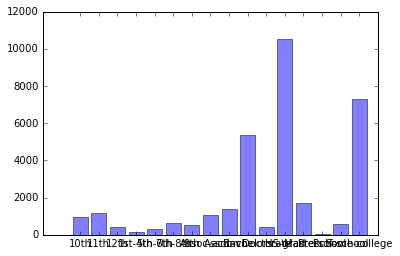

In [54]:
objects = ("10th", "11th", "12th", "1st-4th", "5th-6th", "7th-8th", "9th", "Assoc-acdm", "Assoc-voc", "Bachelors", "Doctorate", "HS-grad", "Masters", "Preschool", "Prof-school", 'Some-college')
y_pos = np.arange(len(objects))
performance = [933, 1175, 433, 168, 333, 646, 514, 1067, 1382, 5355, 413, 10501, 1723, 51, 576, 7291]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

 
plt.show()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [26]:
df.groupby('marital-status')['fnlwgt'].describe()

marital-status              
Divorced               count    4.443000e+03
                       mean     1.858028e+05
                       std      1.056468e+05
                       min      1.941000e+04
                       25%      1.155825e+05
                       50%      1.753700e+05
                       75%      2.310475e+05
                       max      1.484705e+06
Married-AF-spouse      count    2.300000e+01
                       mean     1.881656e+05
                       std      1.398688e+05
                       min      2.689200e+04
                       25%      8.679750e+04
                       50%      1.696310e+05
                       75%      2.385695e+05
                       max      5.440910e+05
Married-civ-spouse     count    1.497600e+04
                       mean     1.867632e+05
                       std      1.030975e+05
                       min      1.376900e+04
                       25%      1.162070e+05
                       50%

Ответ: среднее: 185802. Стандартное отклонение: 105646

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [18]:
df.groupby('education')['50K'].describe()

education           
10th          count       933
              unique        2
              top       <=50K
              freq        871
11th          count      1175
              unique        2
              top       <=50K
              freq       1115
12th          count       433
              unique        2
              top       <=50K
              freq        400
1st-4th       count       168
              unique        2
              top       <=50K
              freq        162
5th-6th       count       333
              unique        2
              top       <=50K
              freq        317
7th-8th       count       646
              unique        2
              top       <=50K
              freq        606
9th           count       514
              unique        2
              top       <=50K
              freq        487
Assoc-acdm    count      1067
              unique        2
                        ...  
Assoc-voc     top       <=50K
              freq 

In [28]:
(871 + 1115 + 400 + 162 + 317 + 606 + 487 + 51 + 423 + 5904 + 3134) / (933 + 1175 + 433 + 168 + 333 + 646 + 514 + 51 + 576 + 7291 + 5355)

0.7708154506437769

77 % Такова доля тех, кто получает меньше 50К среди тех, у кого нет высшего образования

In [26]:
df.groupby('sex')['50K'].describe()

sex           
Female  count     10771
        unique        2
        top       <=50K
        freq       9592
Male    count     21790
        unique        2
        top       <=50K
        freq      15128
Name: 50K, dtype: object

In [27]:
(9592 + 15128) / (10771 + 21790)

0.7591904425539756

75,91% - доля тех, кто зарабатывает меньше 50К среди всей выборки. 75% < 77%, значит люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [50]:
df.groupby('native-country')['occupation'].describe()

native-country            
?                   count                   583
                    unique                   14
                    top          Prof-specialty
                    freq                    102
Cambodia            count                    19
                    unique                    8
                    top            Craft-repair
                    freq                      6
Canada              count                   121
                    unique                   13
                    top          Prof-specialty
                    freq                     24
China               count                    75
                    unique                    9
                    top          Prof-specialty
                    freq                     22
Columbia            count                    59
                    unique                   12
                    top       Machine-op-inspct
                    freq                     10
Cuba         

Ответ: Cambodia, Canada, China, Columbia, Cuba, Dominican-Republic, Ecuador, Scotland, South, Taiwan, Thailand, Trinadad&Tobago, United-States, Vietnam, Yugoslavia 

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?